In [10]:
#import necessary library
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%run utility.ipynb

Load the necessary dataframes.
Total deaths, new deaths, total cases and new cases are retrieved from the full dataset on Internet. Population dataset, updated with 2020 data, is loaded locally. 
Print the tail of the full dataset to view the date of last update.

In [12]:
#load full dataset of coronavirus from internet
df_all_data_ = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")
df_all_data_.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths
8794,2020-03-31,Zimbabwe,0,0,7,1
8795,2020-04-01,Zimbabwe,1,0,8,1
8796,2020-04-02,Zimbabwe,0,0,8,1
8797,2020-04-03,Zimbabwe,0,0,8,1
8798,2020-04-04,Zimbabwe,1,0,9,1


In [13]:
#load population dataset keeping only the necessary columns 
#(countries and number of inhabitants) and renaiming them
population = pd.read_csv("../world_analysis/dataset/population_by_country_2020.csv")
population = population[['Country (or dependency)','Population (2020)']]
population.drop_duplicates(inplace = True)
population.rename(columns={"Country (or dependency)": "location",
                            "Population (2020)":"population_2020"}, inplace = True)
population.head()

,location,population_2020
0,China,1439323776
1,India,1380004385
2,United States,331002651
3,Indonesia,273523615
4,Pakistan,220892340


Merge coronavirus dataset and population dataset and rename the columns with a more meaningful name.

In [14]:
df_all_data = df_all_data_.copy()
df_all_data = pd.merge (left = df_all_data, right = population, on = 'location')
df_all_data.rename(columns={"location": "Country","date":"Date", "new_cases":"New cases",
                            "new_deaths":"New deaths","total_cases":"Total cases", 
                            "total_deaths":"Total deaths", "population_2020":"Population"}, 
                   inplace = True)
df_all_data.head()

,Date,Country,New cases,New deaths,Total cases,Total deaths,Population
0,2019-12-31,Afghanistan,0,0,0,0,38928346
1,2020-01-01,Afghanistan,0,0,0,0,38928346
2,2020-01-02,Afghanistan,0,0,0,0,38928346
3,2020-01-03,Afghanistan,0,0,0,0,38928346
4,2020-01-04,Afghanistan,0,0,0,0,38928346


Evaluate number of cases and deaths per million of inhabitants and store the information in new columns of the full dataset.

In [16]:
df_all_data = evaluateRatePerNumberOfMillion(df_all_data, 'New cases',
                                            'New cases per million of inhabitants')
df_all_data = evaluateRatePerNumberOfMillion(df_all_data, 'Total cases',
                                            'Total cases per million of inhabitants')
df_all_data = evaluateRatePerNumberOfMillion(df_all_data, 'New deaths',
                                            'New deaths per million of inhabitants')
df_all_data = evaluateRatePerNumberOfMillion(df_all_data, 'Total deaths',
                                            'Total deaths per million of inhabitants')
df_all_data.tail()

,Date,Country,New cases,New deaths,Total cases,Total deaths,Population,New cases per million of inhabitants,Total cases per million of inhabitants,New deaths per million of inhabitants,Total deaths per million of inhabitants
8185,2020-03-31,Zimbabwe,0,0,7,1,14862924,0.000000,0.470971,0.0,0.067282
8186,2020-04-01,Zimbabwe,1,0,8,1,14862924,0.067282,0.538252,0.0,0.067282
8187,2020-04-02,Zimbabwe,0,0,8,1,14862924,0.000000,0.538252,0.0,0.067282
8188,2020-04-03,Zimbabwe,0,0,8,1,14862924,0.000000,0.538252,0.0,0.067282
8189,2020-04-04,Zimbabwe,1,0,9,1,14862924,0.067282,0.605534,0.0,0.067282


Print data of the top 10 countries for number of deaths and plot the growth starting from the first 100 confirmed deaths.

World number of deaths: 56042

          Country  Total deaths
0           Italy         14681
1           Spain         10935
2   United States          7157
3          France          4503
4  United Kingdom          3605
5           China          3330
6            Iran          3160
7     Netherlands          1487
8         Belgium          1143
9         Germany          1017


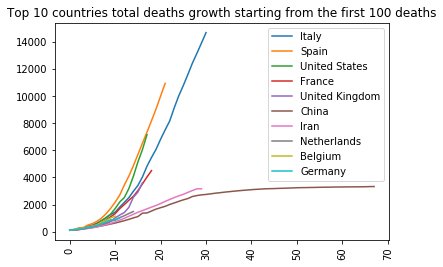

In [17]:
#create a copy of the dataset keeping the necessary columns
df_total_deaths = df_all_data[['Country','Total deaths']].copy()

#get the maximum value of each country and sort the data in descendent way
df_group_total_deaths = df_total_deaths.groupby('Country').max()
df_group_total_deaths.sort_values(by = 'Total deaths',ascending = False, inplace = True)
#print data of all the world deaths
print("World number of deaths:", df_group_total_deaths['Total deaths'].sum(), end ="\n\n")
#loc the first 10 rows (it starts form the row 1 and not row 0 because
#the first row contains data of all the world)
top_10_total_deaths = df_group_total_deaths.iloc[0:10]
top_10_total_deaths.reset_index(inplace = True)
#print the data
print(top_10_total_deaths)
#plot the graph
plotGrowthDataFromFirstCases(df_total_deaths, top_10_total_deaths['Country'], 'Total deaths',
                            'Top 10 countries total deaths growth starting from the first 100 deaths',
                            100)

Print data of the top 10 countries for number of cases and plot the growth starting from the first 100 confirmed case.

World number of cases: 1070514

          Country  Total cases
0   United States       277965
1           Italy       119827
2           Spain       117710
3           China        82527
4         Germany        79696
5          France        59105
6            Iran        50468
7  United Kingdom        38168
8          Turkey        20921
9     Switzerland        19706


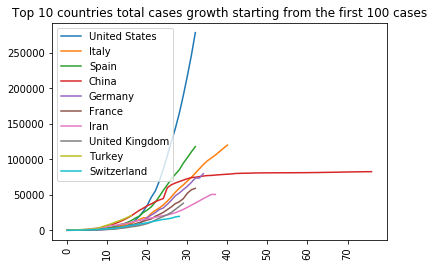

In [18]:
#create a copy of the dataset keeping the necessary columns
df_total_cases = df_all_data[['Country','Total cases']].copy()

#get the maximum value of each country and sort the data in descendent way
df_group_total_cases = df_total_cases.groupby('Country').max()
df_group_total_cases.sort_values(by = 'Total cases',ascending = False, inplace = True)
#print data of all the world deaths
print("World number of cases:", df_group_total_cases['Total cases'].sum(), end ="\n\n")
#loc the first 10 rows (it starts form the row 1 and not row 0 because
#the first row contains data of all the world)
top_10_total_cases = df_group_total_cases.iloc[0:10]
top_10_total_cases.reset_index(inplace = True)
#print the data
print(top_10_total_cases)
#plot the graph
plotGrowthDataFromFirstCases(df_total_cases, top_10_total_cases['Country'],'Total cases',
                            'Top 10 countries total cases growth starting from the first 100 cases',
                            100)

Print data of the top 10 countries for number of deaths per million and plot the growth starting from the point where the rate was upper than 10.

          Country  Total deaths per million of inhabitants
0      San Marino                               943.090389
1           Italy                               242.814367
2           Spain                               233.879840
3         Andorra                               207.079531
4         Belgium                                98.622708
5     Netherlands                                86.782090
6     Switzerland                                70.135934
7          France                                68.986637
8  United Kingdom                                53.103724
9      Luxembourg                                49.522507


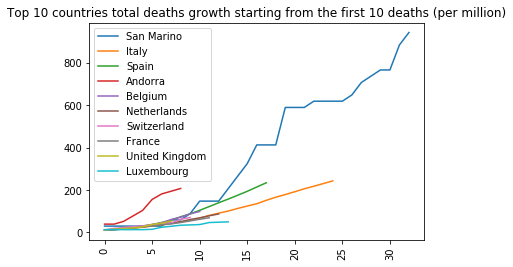

In [23]:
#create a copy of the dataset
df_total_deaths_x_million = df_all_data[['Country',
                                         'Total deaths per million of inhabitants']].copy()

#get the maximum value of each country and sort the data in descendent way
df_group_total_deaths_x_million = df_total_deaths_x_million.groupby('Country').max()
df_group_total_deaths_x_million.sort_values(by = 'Total deaths per million of inhabitants',ascending = False, inplace = True)


#loc the first 10 rows
top_10_total_deaths_x_million = df_group_total_deaths_x_million.iloc[0:10]
top_10_total_deaths_x_million.reset_index(inplace = True)
#print the data
print(top_10_total_deaths_x_million)
#plot the graph
plotGrowthDataFromFirstCases(df_total_deaths_x_million, top_10_total_deaths_x_million['Country'], 
                            'Total deaths per million of inhabitants',
                            'Top 10 countries total deaths growth starting from the first 10 deaths (per million)',
                            10)

Print data of the top 10 countries for number of cases per million and plot the growth starting from the point where the rate was upper than 10.

          Country  Total cases per million of inhabitants
0      San Marino                             7397.365241
1         Andorra                             5681.744645
2      Luxembourg                             4172.670605
3         Iceland                             3997.151590
4  Faeroe Islands                             3663.303522
5       Gibraltar                             2819.744145
6           Spain                             2517.603655
7     Switzerland                             2276.933643
8           Italy                             1981.862076
9   Liechtenstein                             1967.058330


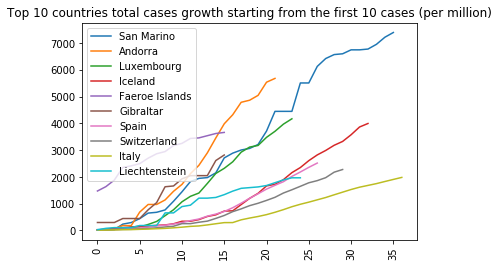

In [25]:
#create a copy of the dataset
df_total_cases_x_million = df_all_data[['Country',
                                         'Total cases per million of inhabitants']].copy()


#get the maximum value of each country and sort the data in descendent way
df_group_total_cases_x_million = df_total_cases_x_million.groupby('Country').max()
df_group_total_cases_x_million.sort_values(by = 'Total cases per million of inhabitants',ascending = False, inplace = True)
#loc the first 10 rows
top_10_total_cases_x_million = df_group_total_cases_x_million.iloc[0:10]
top_10_total_cases_x_million.reset_index(inplace = True)
#print the data
print(top_10_total_cases_x_million)
#plot the graph
plotGrowthDataFromFirstCases(df_total_cases_x_million, top_10_total_cases_x_million['Country'], 
                            'Total cases per million of inhabitants',
                            'Top 10 countries total cases growth starting from the first 10 cases (per million)',
                            10)

Print data of the top ten day/country for new deaths

In [28]:
#copy the dataframe
df_new_deaths = df_all_data[['Date','Country','New deaths']].copy()
#delete the row regarding the entire world
df_new_deaths = df_new_deaths[df_new_deaths['Country'] != 'World']
#sort the data in descending order and print the top 10 rows
df_new_deaths.sort_values(by = 'New deaths', ascending = False, inplace = True)
df_new_deaths.head(10)

,Date,Country,New deaths
8003,2020-04-04,United States,1104
8001,2020-04-02,United States,1059
4010,2020-03-28,Italy,971
7058,2020-04-03,Spain,950
7059,2020-04-04,Spain,932
8002,2020-04-03,United States,915
8000,2020-04-01,United States,909
4011,2020-03-29,Italy,887
7057,2020-04-02,Spain,864
7056,2020-04-01,Spain,849


Print data of the top ten day/country for new cases

In [29]:
#copy the dataframe
df_new_cases = df_all_data[['Date','Country','New cases']].copy()
#delete the row regarding the entire world
df_new_cases = df_new_cases[df_new_cases['Country'] != 'World']
df_new_cases.sort_values(by = 'New cases', ascending = False, inplace = True)
df_new_cases.head(10)

,Date,Country,New cases
8003,2020-04-04,United States,32425
8002,2020-04-03,United States,28819
8001,2020-04-02,United States,27103
8000,2020-04-01,United States,24998
7999,2020-03-31,United States,21595
7997,2020-03-29,United States,19979
7996,2020-03-28,United States,18695
7998,2020-03-30,United States,18360
7995,2020-03-27,United States,16797
1643,2020-02-13,China,15141


Print the weekly growth rate of the total number of deaths for some countries

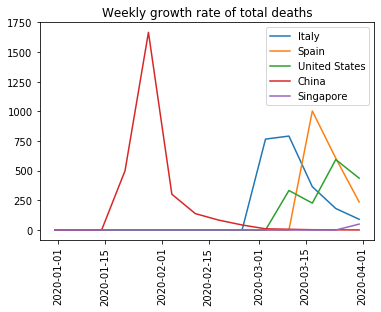

In [52]:
df_total_deaths = df_all_data[['Date','Country','Total deaths']].copy()
death_growth_rate = evaluateGrowthRate(df_total_deaths, 7, 'Total deaths')
countries_list = ['Italy', 'Spain', 'United States','China','Singapore']
some_countries_deaths_growth = death_growth_rate[countries_list]

for country in countries_list:
    plt.plot(some_countries_deaths_growth[country], label = country)
plt.legend()
plt.xticks(rotation = 90)
plt.title("Weekly growth rate of total deaths")
plt.show()

Plot the 3 days growth rate of the total number of cases for some countries

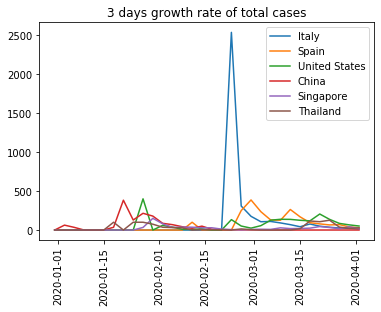

In [53]:
df_total_cases = df_all_data[['Date','Country','Total cases']].copy()
case_growth_rate = evaluateGrowthRate(df_total_cases, 3, 'Total cases')
countries_list = ['Italy', 'Spain', 'United States','China','Singapore','Thailand']
some_countries_cases_growth = case_growth_rate[countries_list]

for country in countries_list:
    plt.plot(some_countries_cases_growth[country], label = country)
plt.legend()
plt.xticks(rotation = 90)
plt.title("3 days growth rate of total cases")
plt.show()


In [54]:
some_countries_cases_growth

,Italy,Spain,United States,China,Singapore,Thailand
2019-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.000000,0.000000,0.000000,62.962963,0.000000,0.000000
2020-01-06,0.000000,0.000000,0.000000,34.090909,0.000000,0.000000
2020-01-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-18,0.000000,0.000000,0.000000,35.593220,0.000000,100.000000
2020-01-21,0.000000,0.000000,0.000000,382.500000,0.000000,0.000000
2020-01-24,0.000000,0.000000,0.000000,128.497409,0.000000,100.000000
2020-01-27,0.000000,0.000000,400.000000,214.625850,33.333333,100.000000
